<a href="https://colab.research.google.com/github/vishalrk1/pytorch/blob/main/DeepLearning_with_Pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telling Dirds from airplanes

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_path = 'CIFAR10/'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2470, 0.2435, 0.2616))
])

train_data = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
valid_data = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_data)

50000

In [ ]:
class_names = train_data.classes
class_len = len(class_names)

In [ ]:
image, label = train_data[99]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


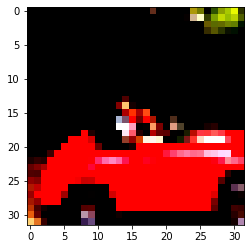

In [ ]:
image = image.permute((1, 2, 0))

plt.imshow(image)
plt.show()

In [ ]:
imgs = torch.stack([img for img, _ in train_data], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

train_dataset = [(img, label_map[label]) for img, label in train_data if label in [0, 2]]

valid_dataset = [(img, label_map[label]) for img, label in valid_data if label in [0, 2]]

In [ ]:
len(train_dataset)

10000

In [ ]:
32*32*3

3072

In [ ]:
# defining model
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim= 1),
)

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle=True)

valid_dataloader = DataLoader(valid_dataset, batch_size = 32, shuffle=True)

In [ ]:
epochs = 50

for epoch in range(epochs):
  for img, labels in train_dataloader:
    batch_size = img.shape[0]
    pred = model(img.view(batch_size, -1))
    loss = criterion(pred, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.248297
Epoch: 1, Loss: 0.507545
Epoch: 2, Loss: 0.470019
Epoch: 3, Loss: 0.344460
Epoch: 4, Loss: 0.473282
Epoch: 5, Loss: 0.406540
Epoch: 6, Loss: 0.361652
Epoch: 7, Loss: 0.516309
Epoch: 8, Loss: 0.198261
Epoch: 9, Loss: 0.700940
Epoch: 10, Loss: 0.268313
Epoch: 11, Loss: 0.521171
Epoch: 12, Loss: 0.154453
Epoch: 13, Loss: 0.145037
Epoch: 14, Loss: 0.302983
Epoch: 15, Loss: 0.426984
Epoch: 16, Loss: 0.536536
Epoch: 17, Loss: 0.336187
Epoch: 18, Loss: 0.389803
Epoch: 19, Loss: 0.497461
Epoch: 20, Loss: 0.433757
Epoch: 21, Loss: 0.331496
Epoch: 22, Loss: 0.276541
Epoch: 23, Loss: 0.221667
Epoch: 24, Loss: 0.431252
Epoch: 25, Loss: 0.516633
Epoch: 26, Loss: 0.319256
Epoch: 27, Loss: 0.513841
Epoch: 28, Loss: 0.392866
Epoch: 29, Loss: 0.392488
Epoch: 30, Loss: 0.642057
Epoch: 31, Loss: 0.397947
Epoch: 32, Loss: 0.264731
Epoch: 33, Loss: 0.336315
Epoch: 34, Loss: 0.573208
Epoch: 35, Loss: 0.313224
Epoch: 36, Loss: 0.338860
Epoch: 37, Loss: 0.275797
Epoch: 38, Loss: 0.277

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in valid_dataloader:
    batch_size = imgs.shape[0]
    pred = model(imgs.view(batch_size, -1))
    _, predictions = torch.max(pred, dim=1)
    total += labels.shape[0]
    correct += int((predictions == labels).sum())

print("Accuracy: %f", correct / total)

Accuracy: %f 0.817


In [ ]:
## conv model
class Net(nn.Module):
  def __init__(self):
    super().__init__()

    # image => 3*32*32
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.dropout_1 = nn.Dropout(p=0.4)

    # image 16*16*16
    self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
    self.dropout_2 = nn.Dropout(p=0.4)

    # image 8*8*8
    self.fc1 = nn.Linear(16*8*8, 32)
    self.fc2 = nn.Linear(32, 2)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), 2)
    x = self.dropout_1(x)
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = self.dropout_2(x)
    x = x.view(-1, 16*8*8)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x



In [ ]:
model = Net()
model

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_1): Dropout(p=0.4, inplace=False)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_2): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
def train_loop(n_epochs, model, optimizer, loss_fn, train_loader, val_loader):
  model.train()
  for epoch in range(n_epochs):
    print(f'\nEpoch {epoch+1}')
    train_loss, train_acc = 0.0, 0.0
    val_loss, val_acc = 0.0, 0.0

    for images, labels in train_loader:
      outputs = model(images)

      _, pred = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, labels)

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

      train_loss += loss.item() 

      train_acc += int((pred == labels).sum()) / len(pred)

    # validating 
    model.eval()
    for images, labels in val_loader:
      with torch.no_grad():
        outputs = model(images)

        _, pred = torch.max(outputs, dim=1)

        loss = loss_fn(outputs, labels)

        val_loss += loss.item()
        val_acc += int((pred == labels).sum()) / len(pred)

    
    train_loss = train_loss / len(train_loader)
    train_acc = train_acc / len(train_loader)

    val_loss = val_loss / len(val_loader)
    val_acc = val_acc / len(val_loader)

    print(f"Training Loss: {train_loss:.3f}   Training Accuracy: {train_acc:.2f}")
    print(f"Validation Loss: {val_loss:.3f}   Validation Accuracy: {val_acc:.2f}")

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
train_loop(
    15, 
    optimizer=optimizer, 
    model=model, 
    loss_fn=criterion, 
    train_loader=train_dataloader,
    val_loader = valid_dataloader,
)


Epoch 1
Training Loss: 0.457   Training Accuracy: 0.79
Validation Loss: 0.357   Validation Accuracy: 0.84

Epoch 2
Training Loss: 0.323   Training Accuracy: 0.86
Validation Loss: 0.307   Validation Accuracy: 0.87

Epoch 3
Training Loss: 0.283   Training Accuracy: 0.88
Validation Loss: 0.280   Validation Accuracy: 0.88

Epoch 4
Training Loss: 0.261   Training Accuracy: 0.89
Validation Loss: 0.272   Validation Accuracy: 0.89

Epoch 5
Training Loss: 0.237   Training Accuracy: 0.90
Validation Loss: 0.260   Validation Accuracy: 0.90

Epoch 6
Training Loss: 0.216   Training Accuracy: 0.91
Validation Loss: 0.267   Validation Accuracy: 0.89

Epoch 7
Training Loss: 0.201   Training Accuracy: 0.92
Validation Loss: 0.256   Validation Accuracy: 0.90

Epoch 8
Training Loss: 0.180   Training Accuracy: 0.93
Validation Loss: 0.271   Validation Accuracy: 0.90

Epoch 9
Training Loss: 0.160   Training Accuracy: 0.93
Validation Loss: 0.239   Validation Accuracy: 0.90

Epoch 10
Training Loss: 0.148   Trai